# **Loan Status Prediction Model**

### **Libraries Used**

In [2]:
# Dataset Manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model Preprocessing
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder,StandardScaler

# Model Creation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

# Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report

# Model Export
import pickle

### **Dataset Load**

In [3]:
df = pd.read_csv('dataset/loan_data_4.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


### **Data Preprocessing 1**

#### **Dataset About**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


* Age has a very high value
* Person income's are way higher than the loan amount
* Employee Experience is way too high
* Loan Percent Income will be removed

In [6]:
df.duplicated().sum()

np.int64(0)

#### **New Dataset**

In [7]:
df_new = df.copy()

In [8]:
df_new.columns = df_new.columns.str.strip()
df_new.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [9]:
df_new.rename(columns={'person_age':'age', 
                        'person_gender':'gender', 
                        'person_education':'education', 
                        'person_income':'income',
                        'person_emp_exp':'experience', 
                        'person_home_ownership':'home_ownership', 
                        'loan_amnt':'loan_amount', 
                        'cb_person_cred_hist_length':'credit_history',
                        'previous_loan_defaults_on_file':'loan_defaults'},inplace=True)

In [10]:
df_new.columns

Index(['age', 'gender', 'education', 'income', 'experience', 'home_ownership',
       'loan_amount', 'loan_intent', 'loan_int_rate', 'loan_percent_income',
       'credit_history', 'credit_score', 'loan_defaults', 'loan_status'],
      dtype='object')

In [11]:
# Unwanted Column
df_new = df_new.drop(columns=['loan_percent_income'])

In [12]:
# Assuming its USD and converting into INR
df_new['income'] *= 83
df_new['loan_amount'] *= 83

In [13]:
# Feature classes into Title format
for i in df_new.select_dtypes("object").columns:
    df_new[i] = df_new[i].str.title()

In [14]:
df_new.head()

,age,gender,education,income,experience,home_ownership,loan_amount,loan_intent,loan_int_rate,credit_history,credit_score,loan_defaults,loan_status
0,22.0,Female,Master,5971684.0,0,Rent,2905000.0,Personal,16.02,3.0,561,No,1
1,21.0,Female,High School,1019406.0,0,Own,83000.0,Education,11.14,2.0,504,Yes,0
2,25.0,Female,High School,1032354.0,3,Mortgage,456500.0,Medical,12.87,3.0,635,No,1
3,23.0,Female,Bachelor,6619499.0,0,Rent,2905000.0,Medical,15.23,2.0,675,No,1
4,24.0,Male,Master,5489205.0,1,Rent,2905000.0,Medical,14.27,4.0,586,No,1


#### **Outlier Detection**

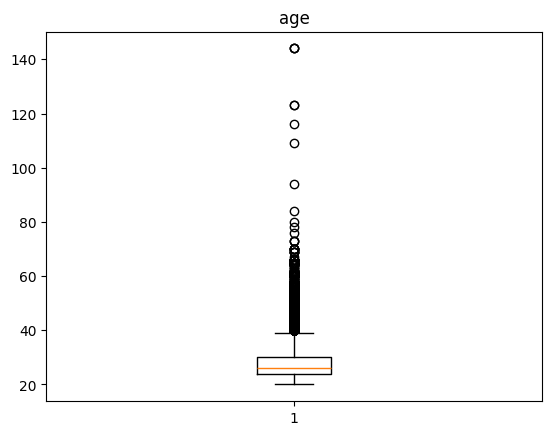

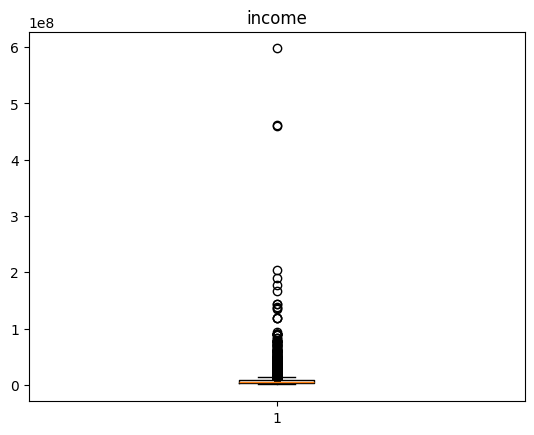

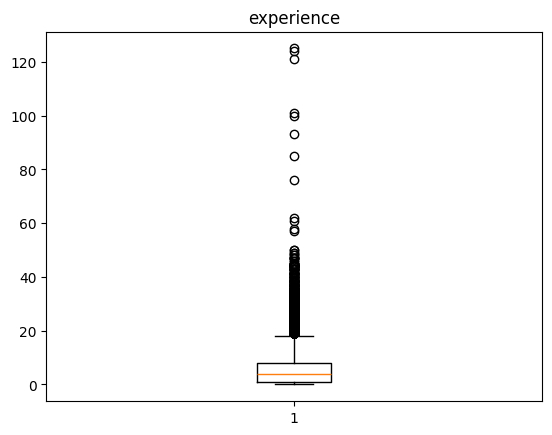

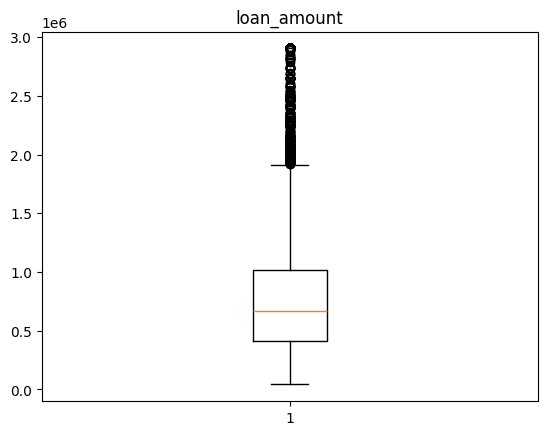

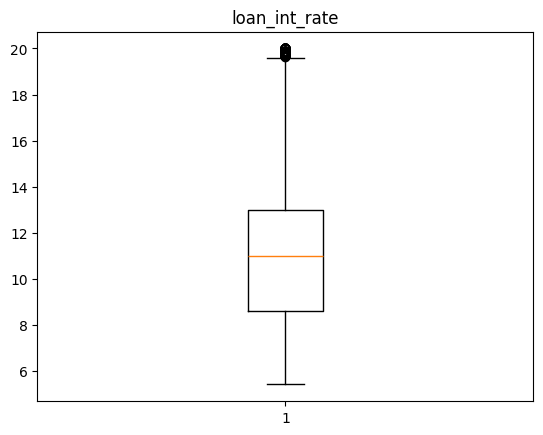

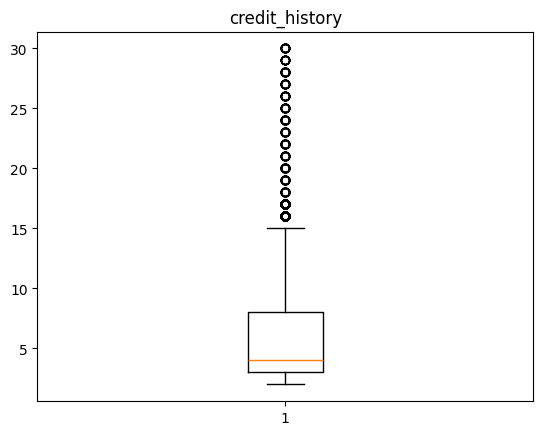

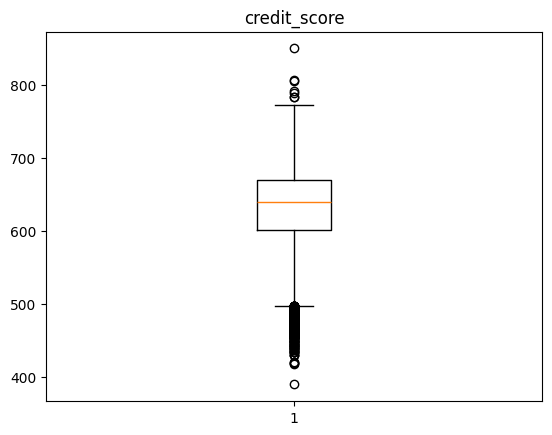

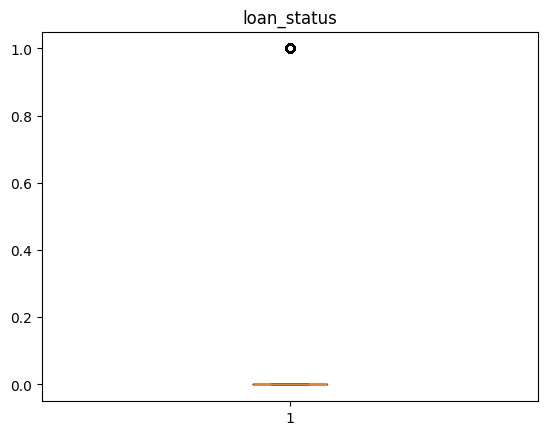

In [15]:
for i in df_new.select_dtypes('number').columns:
    plt.boxplot(df_new[i])
    plt.title(i)
    plt.show()
    print()

* Heavy presence of Outliers
* Mostly in age, income & experience

In [16]:
for i in df_new.select_dtypes('object').columns:
    print(df_new[i].value_counts())
    print()

gender
Male      24841
Female    20159
Name: count, dtype: int64

education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

home_ownership
Rent        23443
Mortgage    18489
Own          2951
Other         117
Name: count, dtype: int64

loan_intent
Education            9153
Medical              8548
Venture              7819
Personal             7552
Debtconsolidation    7145
Homeimprovement      4783
Name: count, dtype: int64

loan_defaults
Yes    22858
No     22142
Name: count, dtype: int64



#### **Outlier Handling**

In [17]:
df_cleaned = df_new.copy()

In [18]:
df_cleaned = df_cleaned[(df_cleaned['age'] <= 80) &
                        (df_cleaned['experience'] <= 50)]

In [19]:
q1 = df_cleaned['income'].quantile(0.25)
q3 = df_cleaned['income'].quantile(0.75)
iqr = q3-q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_cleaned = df_cleaned[(df_cleaned['income'] >= lower_bound) & (df_cleaned['income'] <= upper_bound)]

In [20]:
df_cleaned

,age,gender,education,income,experience,home_ownership,loan_amount,loan_intent,loan_int_rate,credit_history,credit_score,loan_defaults,loan_status
0,22.0,Female,Master,5971684.0,0,Rent,2905000.0,Personal,16.02,3.0,561,No,1
1,21.0,Female,High School,1019406.0,0,Own,83000.0,Education,11.14,2.0,504,Yes,0
2,25.0,Female,High School,1032354.0,3,Mortgage,456500.0,Medical,12.87,3.0,635,No,1
3,23.0,Female,Bachelor,6619499.0,0,Rent,2905000.0,Medical,15.23,2.0,675,No,1
4,24.0,Male,Master,5489205.0,1,Rent,2905000.0,Medical,14.27,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,Male,Associate,3981593.0,6,Rent,1245000.0,Medical,15.66,3.0,645,No,1
44996,37.0,Female,Associate,5461400.0,17,Rent,747000.0,Homeimprovement,14.07,11.0,621,No,1
44997,33.0,Male,Associate,4726186.0,7,Rent,229993.0,Debtconsolidation,10.02,10.0,668,No,1
44998,29.0,Male,Bachelor,2752612.0,4,Rent,996000.0,Education,13.23,6.0,604,No,1


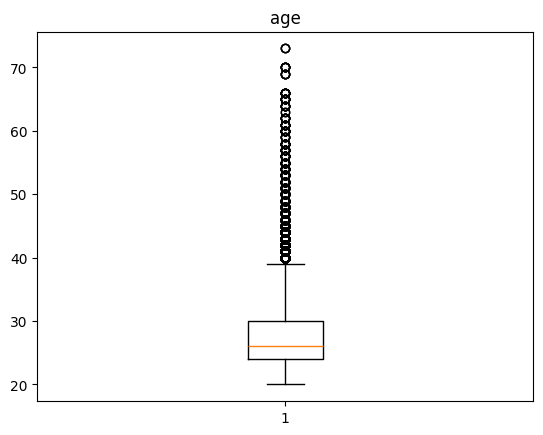

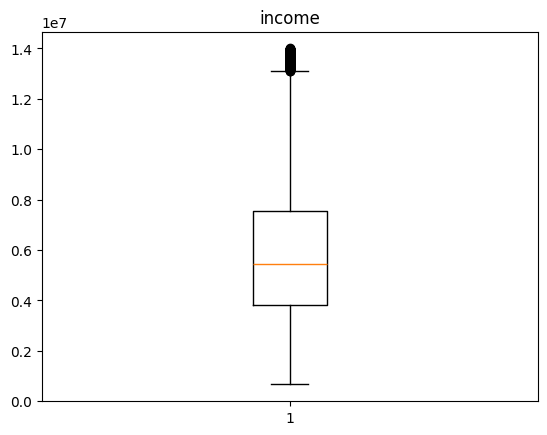

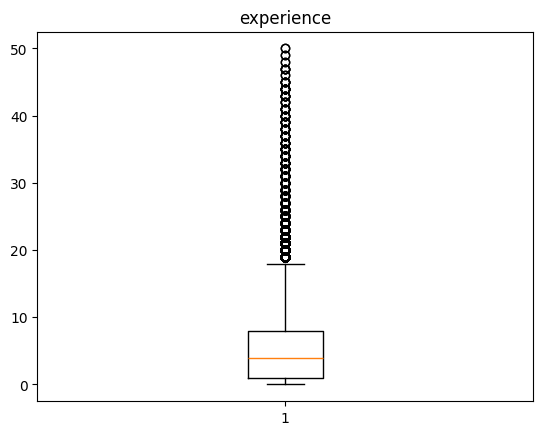

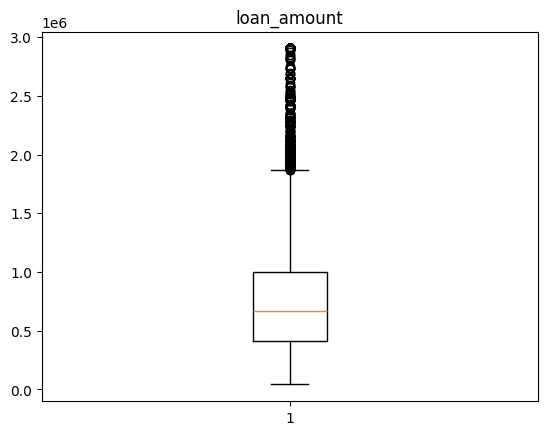

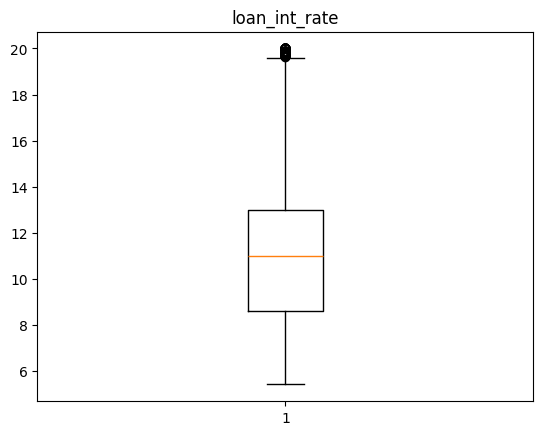

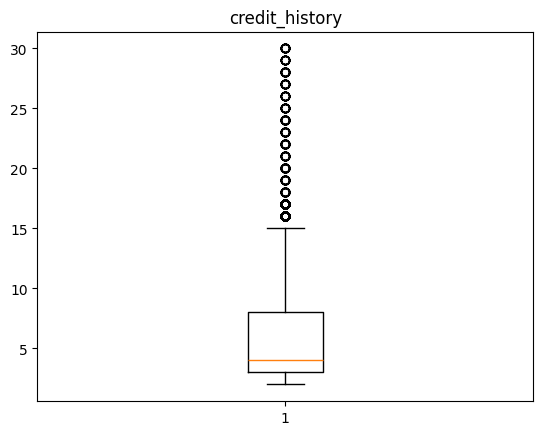

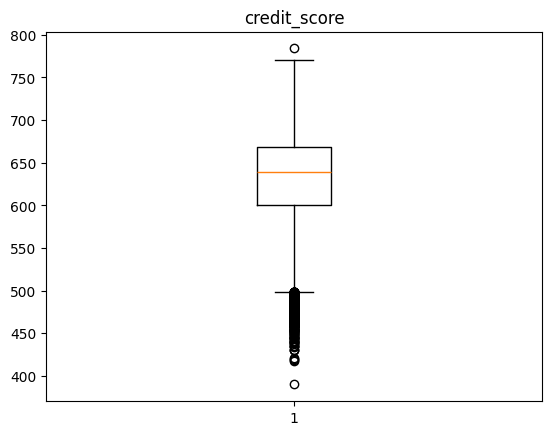

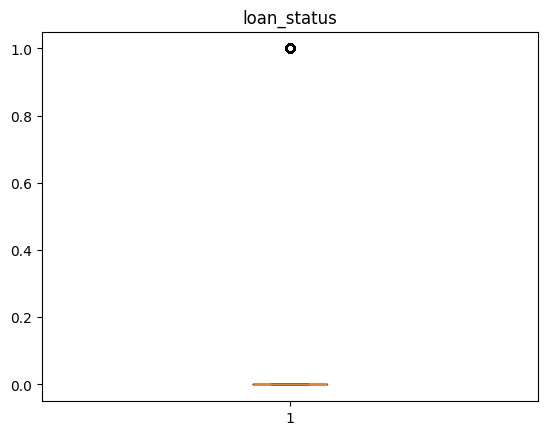

In [21]:
for i in df_cleaned.select_dtypes('number').columns:
    plt.boxplot(df_cleaned[i])
    plt.title(i)
    plt.show()
    print()

* Still not satisfied with the result income is higher than the loan amount (like `x5 times` higher).
* Most of the outlier values here are not an outlier on real world scenarios.

#### **EDA**

In [22]:
df_eda = df_cleaned.copy()

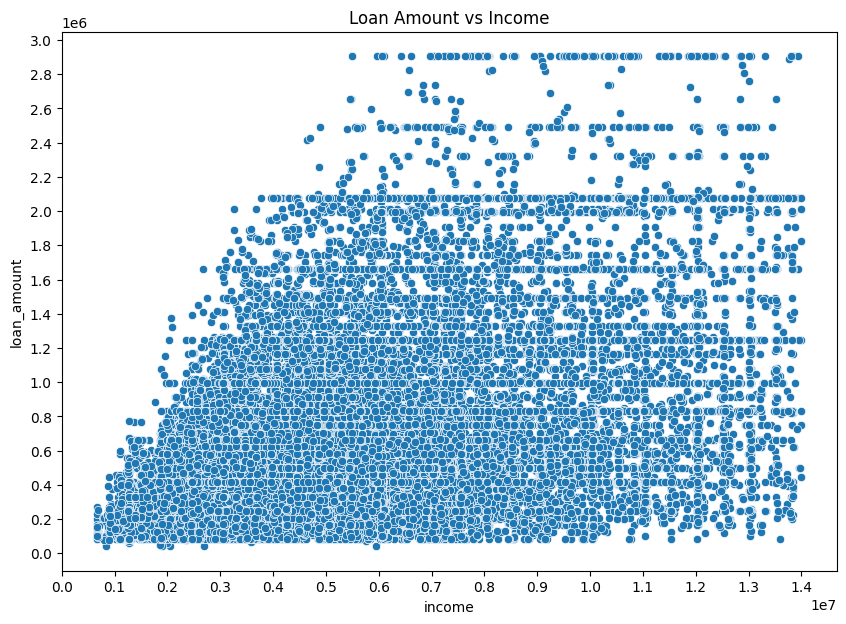

In [23]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df_eda['income'],y=df_eda['loan_amount'])
plt.title('Loan Amount vs Income')
plt.xticks(ticks=np.arange(0.0,1.5e7,0.1e7))
plt.yticks(ticks=np.arange(0.0,3.1e6,0.2e6))
plt.show()

* the income being too higher than the loan amount still is distributed well. 

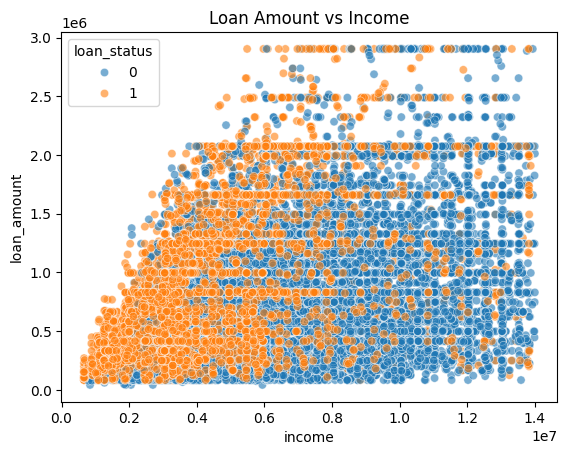

In [24]:
sns.scatterplot(x='income', y='loan_amount', hue='loan_status', data=df_eda, alpha=0.6)
plt.title('Loan Amount vs Income')
plt.show()

* Most approved loans are on income category under `0.8*1e7`.
* How is higher income people getting rejected for loan?
* Should try removing the income level above `0.9*1e7` or `1e7`.

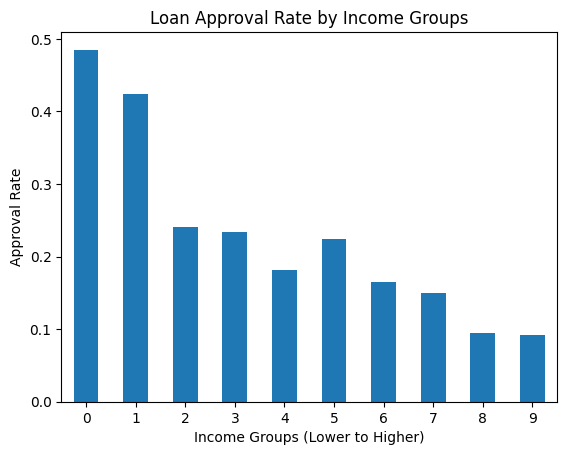

In [25]:
df_eda['income_groups'] = pd.qcut(df_eda['income'], 10, labels=False)
approval_rate = df_eda.groupby('income_groups')['loan_status'].mean()
approval_rate.plot(kind='bar')
plt.title('Loan Approval Rate by Income Groups')
plt.xlabel('Income Groups (Lower to Higher)')
plt.ylabel('Approval Rate')
plt.xticks(rotation=0)
plt.show()

* Low incomes are approved more maybe their loan amounts are lower.

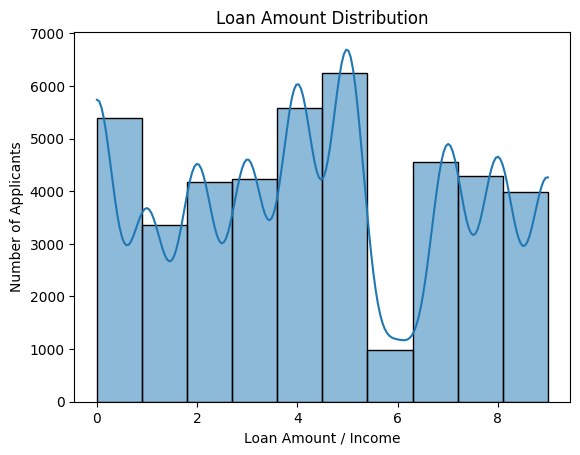

In [26]:
df_eda['loan_groups'] = pd.qcut(df_eda['loan_amount'],10,labels=False)

sns.histplot(df_eda['loan_groups'], bins=10, kde=True)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount / Income')
plt.ylabel('Number of Applicants')
plt.show()

<Axes: >

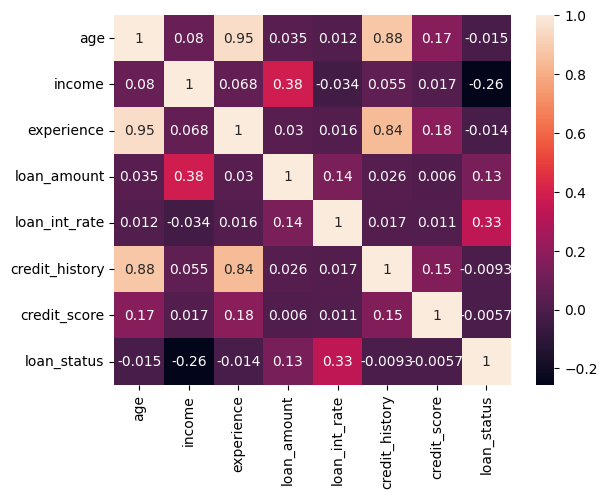

In [27]:
sns.heatmap(df_cleaned.corr(numeric_only=True),annot=True)

#### **Income Adjust**

In [28]:
df_cleaned = df_cleaned[df_cleaned['income'] <= 1e7]

In [29]:
df_cleaned.describe()

,age,income,experience,loan_amount,loan_int_rate,credit_history,credit_score,loan_status
count,38660.000000,3.866000e+04,38660.000000,3.866000e+04,38660.000000,38660.000000,38660.000000,38660.000000
mean,27.506105,5.284340e+06,5.177031,7.351579e+05,11.001668,5.733368,632.259493,0.244154
std,5.817974,2.049076e+06,5.819750,4.735653e+05,2.970947,3.823925,50.336018,0.429590
min,20.000000,6.640000e+05,0.000000,4.150000e+04,5.420000,2.000000,390.000000,0.000000
25%,23.000000,3.663267e+06,1.000000,4.067000e+05,8.590000,3.000000,601.000000,0.000000
50%,26.000000,5.072047e+06,3.000000,6.225000e+05,11.010000,4.000000,639.000000,0.000000
75%,30.000000,6.761761e+06,8.000000,9.960000e+05,13.040000,8.000000,669.000000,0.000000
max,73.000000,9.999093e+06,50.000000,2.905000e+06,20.000000,30.000000,784.000000,1.000000


### **Data Preprocessing 2**

#### **Model Details Dictionary**

In [30]:
model_dict = {}

#### **Features & Label**

In [31]:
x = df_cleaned.drop(columns=['loan_status'])
y = df_cleaned['loan_status']

#### **Imbalance Handling**

In [32]:
y.value_counts()

loan_status
0    29221
1     9439
Name: count, dtype: int64

In [33]:
ros = RandomOverSampler()
x_res,y_res = ros.fit_resample(x,y)

In [34]:
y_res.value_counts()

loan_status
1    29221
0    29221
Name: count, dtype: int64

#### **Data Splitting**

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.2,random_state=42)

#### **Data Encoding**

In [36]:
obj_cols = x_train.select_dtypes('object').columns
obj_cols

Index(['gender', 'education', 'home_ownership', 'loan_intent',
       'loan_defaults'],
      dtype='object')

In [37]:
le_gender = LabelEncoder()
x_train['gender'] = le_gender.fit_transform(x_train['gender'])

le_education = LabelEncoder()
x_train['education'] = le_education.fit_transform(x_train['education'])

le_home_ownership = LabelEncoder()
x_train['home_ownership'] = le_home_ownership.fit_transform(x_train['home_ownership'])

le_loan_intent = LabelEncoder()
x_train['loan_intent'] = le_loan_intent.fit_transform(x_train['loan_intent'])

le_loan_defaults = LabelEncoder()
x_train['loan_defaults'] = le_loan_defaults.fit_transform(x_train['loan_defaults'])

In [38]:
x_train

,age,gender,education,income,experience,home_ownership,loan_amount,loan_intent,loan_int_rate,credit_history,credit_score,loan_defaults
9026,22.0,0,0,6247908.0,1,0,498000.0,1,13.92,4.0,557,0
31868,30.0,0,1,5477004.0,10,0,415000.0,3,7.83,5.0,638,1
11711,24.0,0,1,3028587.0,0,3,996000.0,5,7.66,3.0,636,0
3912,24.0,1,3,4071316.0,0,0,290500.0,3,8.88,2.0,630,0
29671,23.0,0,4,3772931.0,0,3,830000.0,0,11.01,3.0,708,1
...,...,...,...,...,...,...,...,...,...,...,...,...
54343,25.0,0,4,2004616.0,6,3,332000.0,0,11.01,3.0,649,0
38158,27.0,0,0,8125285.0,6,3,2490000.0,0,8.44,5.0,632,0
860,25.0,1,4,9623020.0,3,3,1452500.0,2,11.71,2.0,622,1
15795,25.0,1,3,4952527.0,4,0,581000.0,4,6.99,3.0,654,0


In [39]:
model_dict['gender'] = le_gender
model_dict['education'] = le_education
model_dict['home_ownership'] = le_home_ownership
model_dict['loan_intent'] = le_loan_intent
model_dict['loan_defaults'] = le_loan_defaults

model_dict

{'gender': LabelEncoder(),
 'education': LabelEncoder(),
 'home_ownership': LabelEncoder(),
 'loan_intent': LabelEncoder(),
 'loan_defaults': LabelEncoder()}

#### **Correlation Check**

In [40]:
df_encoded = x_train.join(y_train)
df_encoded.head()

,age,gender,education,income,experience,home_ownership,loan_amount,loan_intent,loan_int_rate,credit_history,credit_score,loan_defaults,loan_status
9026,22.0,0,0,6247908.0,1,0,498000.0,1,13.92,4.0,557,0,0
31868,30.0,0,1,5477004.0,10,0,415000.0,3,7.83,5.0,638,1,0
11711,24.0,0,1,3028587.0,0,3,996000.0,5,7.66,3.0,636,0,1
3912,24.0,1,3,4071316.0,0,0,290500.0,3,8.88,2.0,630,0,0
29671,23.0,0,4,3772931.0,0,3,830000.0,0,11.01,3.0,708,1,0


In [41]:
df_encoded.corr(numeric_only=True)['loan_status'].sort_values(ascending=False)

loan_status       1.000000
loan_int_rate     0.375239
home_ownership    0.264656
loan_amount       0.168896
gender            0.001855
education         0.001523
credit_score     -0.013172
credit_history   -0.016065
experience       -0.018589
age              -0.020354
loan_intent      -0.081620
income           -0.298568
loan_defaults    -0.699184
Name: loan_status, dtype: float64

#### **Normalization**

In [42]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)

In [43]:
model_dict['scaler'] = scaler
model_dict

{'gender': LabelEncoder(),
 'education': LabelEncoder(),
 'home_ownership': LabelEncoder(),
 'loan_intent': LabelEncoder(),
 'loan_defaults': LabelEncoder(),
 'scaler': StandardScaler()}

#### **Test Data Transform**

In [44]:
x_test.head()

,age,gender,education,income,experience,home_ownership,loan_amount,loan_intent,loan_int_rate,credit_history,credit_score,loan_defaults
462,21.0,Male,Associate,2109528.0,1,Own,105825.0,Education,15.23,3.0,626,Yes
25946,42.0,Male,High School,4590149.0,19,Own,415000.0,Venture,7.43,12.0,666,No
23785,29.0,Female,Bachelor,3086189.0,5,Own,830000.0,Personal,6.17,5.0,588,Yes
43415,29.0,Male,Bachelor,1875717.0,6,Rent,531200.0,Homeimprovement,10.37,6.0,617,No
13263,25.0,Male,Bachelor,8466083.0,2,Mortgage,415000.0,Debtconsolidation,16.02,3.0,704,No


In [45]:
x_test['gender'] = model_dict['gender'].transform(x_test['gender'])
x_test['education'] = model_dict['education'].transform(x_test['education'])
x_test['home_ownership'] = model_dict['home_ownership'].transform(x_test['home_ownership'])
x_test['loan_intent'] = model_dict['loan_intent'].transform(x_test['loan_intent'])
x_test['loan_defaults'] = model_dict['loan_defaults'].transform(x_test['loan_defaults'])

In [46]:
x_test.head()

,age,gender,education,income,experience,home_ownership,loan_amount,loan_intent,loan_int_rate,credit_history,credit_score,loan_defaults
462,21.0,1,0,2109528.0,1,2,105825.0,1,15.23,3.0,626,1
25946,42.0,1,3,4590149.0,19,2,415000.0,5,7.43,12.0,666,0
23785,29.0,0,1,3086189.0,5,2,830000.0,4,6.17,5.0,588,1
43415,29.0,1,1,1875717.0,6,3,531200.0,2,10.37,6.0,617,0
13263,25.0,1,1,8466083.0,2,0,415000.0,0,16.02,3.0,704,0


### **Model Selection**

In [47]:
models = [KNeighborsClassifier(),SVC(),GaussianNB(),DecisionTreeClassifier()]

for i in models:
    print(i)
    i.fit(x_train,y_train)
    y_pred = i.predict(x_test)
    # print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print()

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.85      0.75      0.80      5848
           1       0.78      0.87      0.82      5841

    accuracy                           0.81     11689
   macro avg       0.81      0.81      0.81     11689
weighted avg       0.81      0.81      0.81     11689


SVC()
              precision    recall  f1-score   support

           0       0.67      0.81      0.73      5848
           1       0.75      0.60      0.67      5841

    accuracy                           0.70     11689
   macro avg       0.71      0.70      0.70     11689
weighted avg       0.71      0.70      0.70     11689


GaussianNB()
              precision    recall  f1-score   support

           0       0.71      0.68      0.69      5848
           1       0.69      0.72      0.71      5841

    accuracy                           0.70     11689
   macro avg       0.70      0.70      0.70     11689
weighted avg       0.70      0

* Decision Tree already provides the best performance (95%)
* Lets try Ensemble techniques also also

### **Ensemble Techniques**

In [48]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      5848
           1       0.93      0.98      0.96      5841

    accuracy                           0.96     11689
   macro avg       0.96      0.96      0.96     11689
weighted avg       0.96      0.96      0.96     11689



In [49]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred = gbc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      5848
           1       0.87      0.93      0.90      5841

    accuracy                           0.89     11689
   macro avg       0.90      0.89      0.89     11689
weighted avg       0.90      0.89      0.89     11689



* Random Forest gives best result 96%

### **Hyperparameter Tuning**

In [50]:
params = {
    'n_estimators': [100, 200],            
    'max_depth': [10, 20, None],           
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 2, 4],         
    'max_features': ['sqrt', 'log2'],      
    'bootstrap': [True, False]             
}

In [51]:
rscv = RandomizedSearchCV(rfc,params,cv=5,scoring="accuracy")
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200]},
                   scoring='accuracy')

In [ ]:
rscv = GridSearchCV(rfc,params,cv=5,scoring="accuracy")
rscv.fit(x_train,y_train)

In [ ]:
rfc = RandomForestClassifier(bootstrap=False, max_features='log2',min_samples_split=5, n_estimators=200)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      5848
           1       0.95      0.98      0.97      5841

    accuracy                           0.97     11689
   macro avg       0.97      0.97      0.97     11689
weighted avg       0.97      0.97      0.97     11689



* Performance improvement from 96% to 97% on Random Search
* Performance improvement from 96% to ??% on Grid Search

### **Cross Validation**

In [ ]:
cvs = cross_val_score(rfc,x_train,y_train,cv=5,scoring='accuracy')
print(cvs)
print(cvs.mean())

[0.95936264 0.95679606 0.96278473 0.95754011 0.96224599]
0.9597459049534007


In [ ]:
model_dict['model'] = rfc

### **Model Export**

In [ ]:
model_dict
with open('Loan_Status_Model.pkl','wb') as f:
    pickle.dump(model_dict,f)